<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW6/Project6_problem1_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 03/05/22
* Assignment: 6

In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
# import dataset
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [3]:
# We will use Income as the target class in this exercise
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


## **Training Data Preparation for Classification**


* For simplicity, only two predictors and the target are retained, as follows:

> * **Marital status**: a categorical predictor with classes married, divorced, never‐married, separated, and widowed.
> * **Cap_gains_losses**: a numerical predictor, equal to **capital gains + |capital losses|**.
> * **Income**: a categorical target variable with two classes >50k and ≤50k

In [4]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


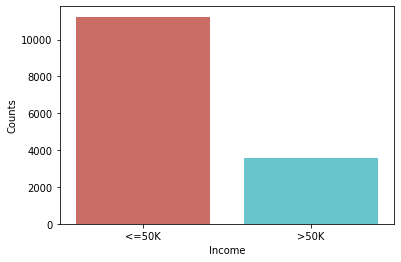

In [5]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()



In [6]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)


,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


# **Train_Test_Split**

In [7]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


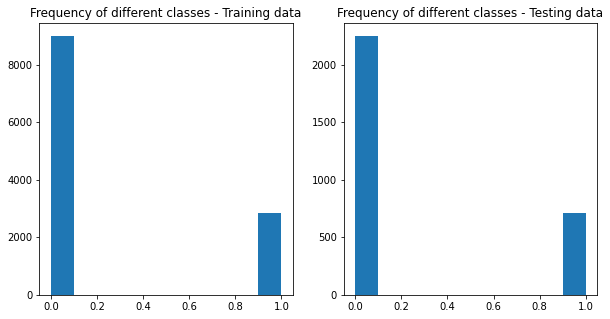

In [8]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');



# **Training, Plotting, and Printing Decision Trees**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
cn = ['low_income', 'hi_income']

#1 Creating function makeDTModel

In [11]:
def makeDTModel(criterion, X_train, y_train,max_depth=None,max_leaf_nodes=None):
  return DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes,random_state = 120).fit(X_train,y_train)

#2 Creating function displayTree

In [12]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)




#3 Creating function displayCM

In [13]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")


#4 Creating function compareModels

In [14]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  # Record CART's classification accuracy on tarining and test datasets
  cart_train_score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  cart_test_score1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

  print ("CART Training and Testing scores: %.2f, %.2f" %  (cart_train_score1, cart_test_score1))


  # Record C5's classification accuracy on tarining and test datasets
  c5_train_score1 = round(c5_classifier1.score(X_train, y_train), 2) # training score
  c5_test_score1 = round(c5_classifier1.score(X_test, y_test), 2)   # testing score

  print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (c5_train_score1, c5_test_score1))


  training_scores = [cart_train_score1, c5_train_score1]
  testing_scores =  [cart_test_score1, c5_test_score1]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

#Creating 4 model with different max_depth and different max_leaf nodes

In [15]:
# Taking max_depth=2 and max_leaf_nodes=3
cart_classifier1 = makeDTModel("gini", X_train, y_train,2,3)
c5_classifier1 = makeDTModel("entropy", X_train, y_train,2,3)

In [16]:
# Taking max_depth=3 and max_leaf_nodes=4
c5_classifier2 = makeDTModel("entropy", X_train, y_train,3,4)
cart_classifier2 = makeDTModel("gini", X_train, y_train,3,4)

In [17]:
# Taking max_depth=4 and max_leaf_nodes=5
c5_classifier3 = makeDTModel("entropy", X_train, y_train,4,5)
cart_classifier3 = makeDTModel("gini", X_train, y_train,4,5)

In [18]:
# using max_depth=None and max_leaf_node=None
cart_classifier4 = makeDTModel("gini", X_train, y_train)    
c5_classifier4 = makeDTModel("entropy", X_train, y_train)


# **Model1(Cart and C5):**

# Display tree for Model1 (Cart and C5)

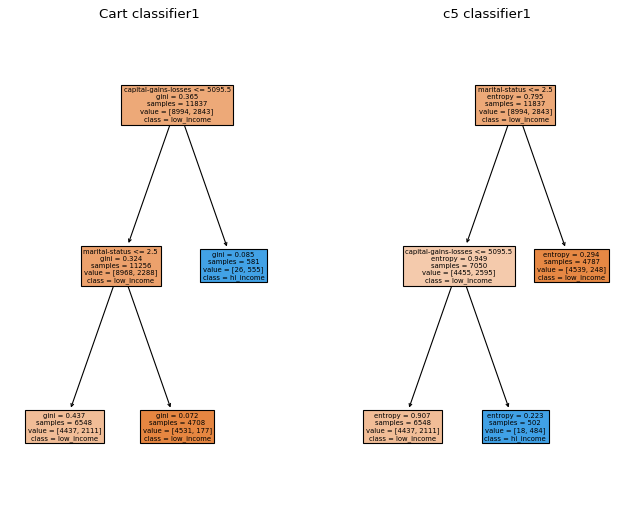

In [19]:
# Display tree for cart_classifier1

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier1, X)
plt.title("Cart classifier1")

# Display tree for c5_classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier1, X)
plt.title("c5 classifier1")
plt.show()

# Confusion matrix for Model1(cart and c5)

-------cart-------
[[2238   11]
 [ 583  128]]
-------c5-------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier1')

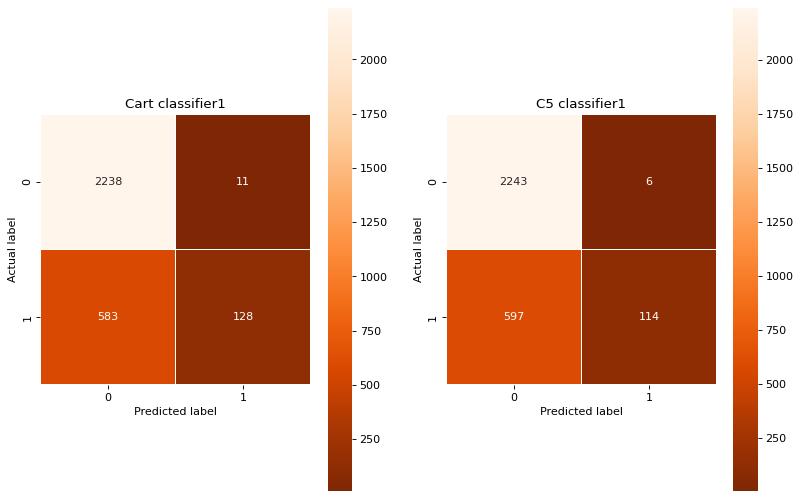

In [20]:
# Display CM for cart_classifier2
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier1, X_train, y_train, X_test, y_test)
plt.title("Cart classifier1")

# Display CM for c5_classifier2
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier1, X_train, y_train, X_test, y_test)
plt.title("C5 classifier1")

# Accuracy and comparison of model1 (Cart and C5)

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


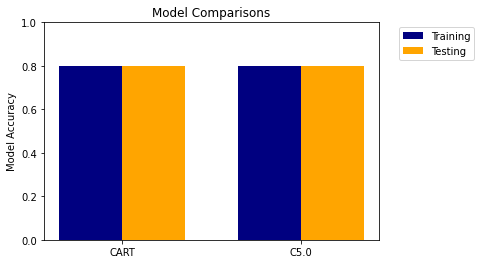

In [21]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier1 and c5_classifier1
compareModels(cart_classifier1, c5_classifier1)

With max depth=2 and max leaf node=3, we were able to achieve an accuracy of 80% for the cart and c5 models.

# **Model2 (Cart and C5):**

# Display tree for model2 (Cart and C5)

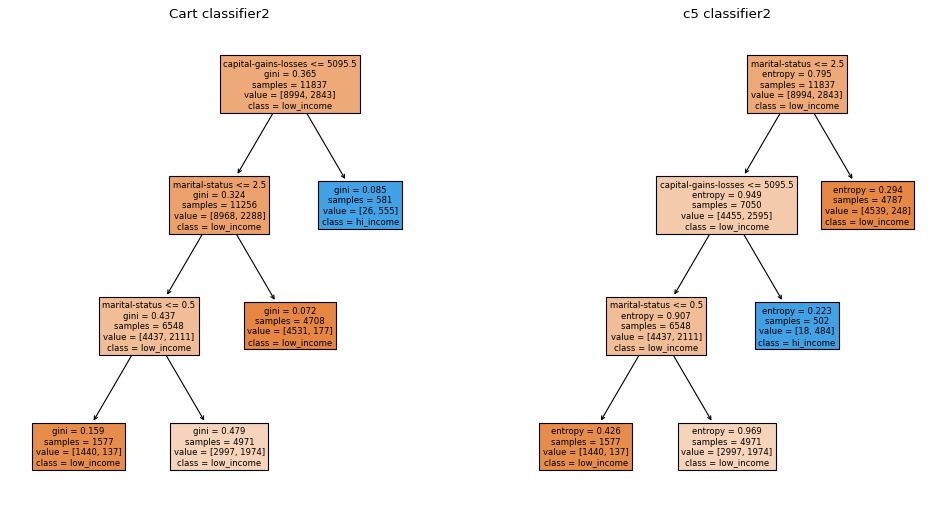

In [22]:
# Display tree for cart_classifier2

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier2, X)
plt.title("Cart classifier2")

# Display tree for c5_classifier2
plt.subplot(1,2,2)
displayTree(c5_classifier2, X)
plt.title("c5 classifier2")
plt.show()

# Confusion Matrix for model2 (Cart and C5)

-------cart-------
[[2238   11]
 [ 583  128]]
-------c5-------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier2')

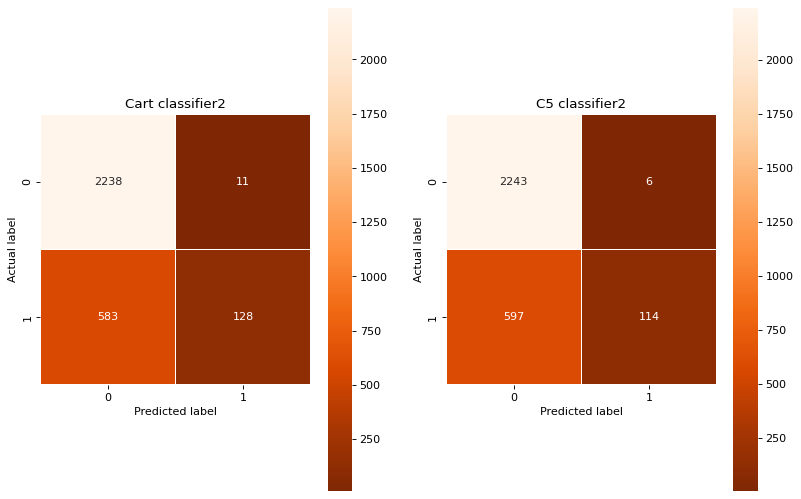

In [23]:
# Display CM for cart_classifier2
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
plt.title("Cart classifier2")

# Display CM for c5_classifier2
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier2, X_train, y_train, X_test, y_test)
plt.title("C5 classifier2")


# Accuracy and comparison of model2 (Cart and C5)

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


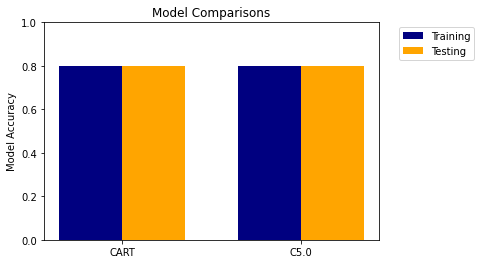

In [24]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier2 and c5_classifier2
compareModels(cart_classifier2, c5_classifier2)

With max depth=3 and max leaf node=4, we were able to achieve an accuracy of 80% for the cart and c5 models.

# **Model3 (Cart and C5):**

# Showing Decision tree for model3 (Cart and C5)

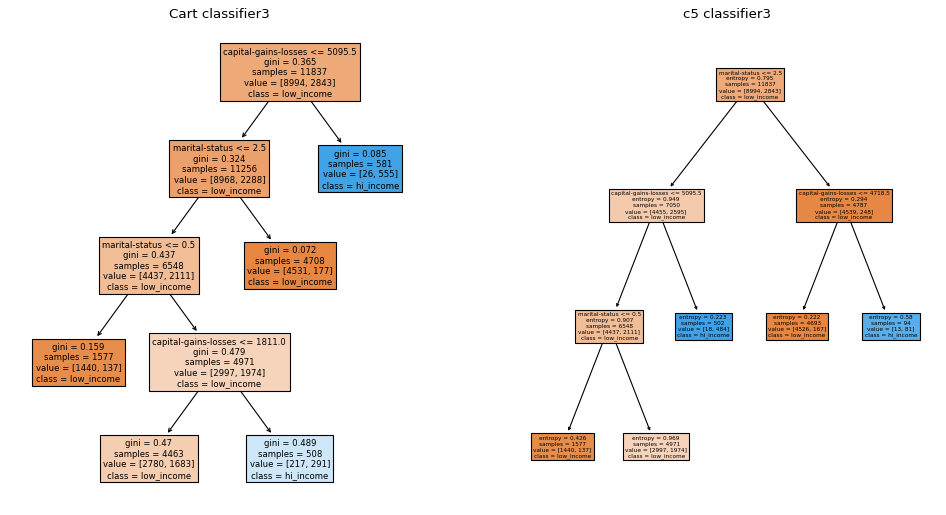

In [25]:
# Display tree for cart_classifier3

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier3, X)
plt.title("Cart classifier3")

# Display tree for c5_classifier3
plt.subplot(1,2,2)
displayTree(c5_classifier3, X)
plt.title("c5 classifier3")
plt.show()

# Confusion matrix for model3 (Cart and C5)

-------cart-------
[[2187   62]
 [ 511  200]]
-------c5-------
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier3')

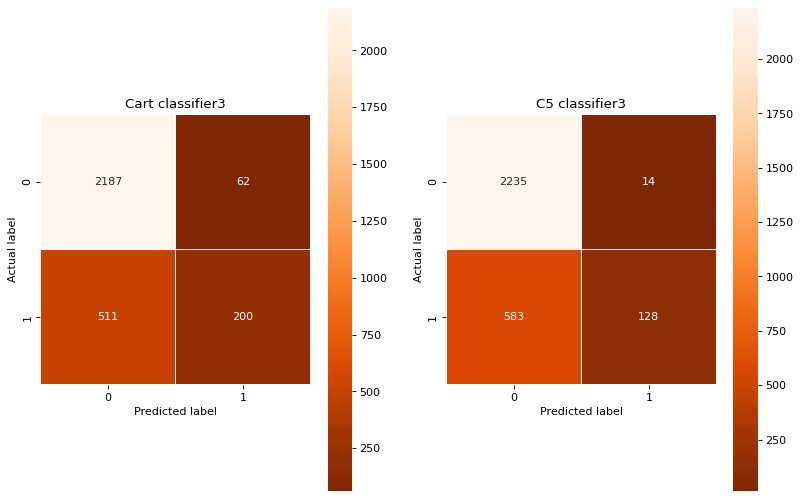

In [26]:
# Display CM for cart_classifier3
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
plt.title("Cart classifier3")

# Display CM for c5_classifier3
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier3, X_train, y_train, X_test, y_test)
plt.title("C5 classifier3")


# Accuracy and comparison between model3 (Cart and C5)

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


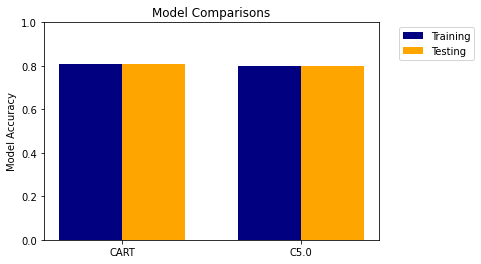

In [27]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier3 and c5_classifier3
compareModels(cart_classifier3, c5_classifier3)


With max depth=4 and max leaf node=5, we were able to achieve an accuracy of 81% for the cart and 80% for the c5 models.

# **Model4 (Cart and C5):**

# Showing Decision tree for model4 (Cart and C5)

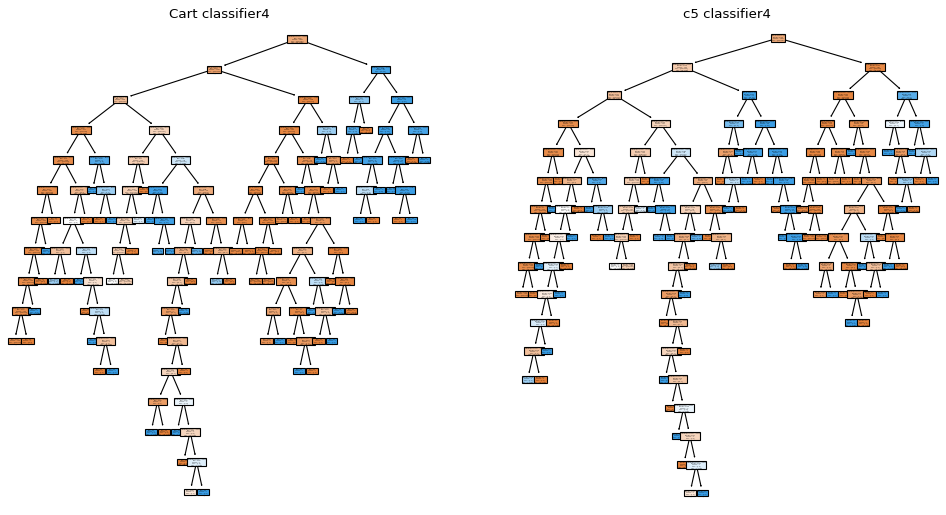

In [28]:
# Display tree for cart_classifier4

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier4, X)
plt.title("Cart classifier4")

# Display tree for c5_classifier4
plt.subplot(1,2,2)
displayTree(c5_classifier4, X)
plt.title("c5 classifier4")
plt.show()

# Confusion matrix for model4 (Cart and C5)

-------cart-------
[[2238   11]
 [ 502  209]]
-------c5-------
[[2237   12]
 [ 502  209]]


Text(0.5, 1.0, 'C5 classifier4')

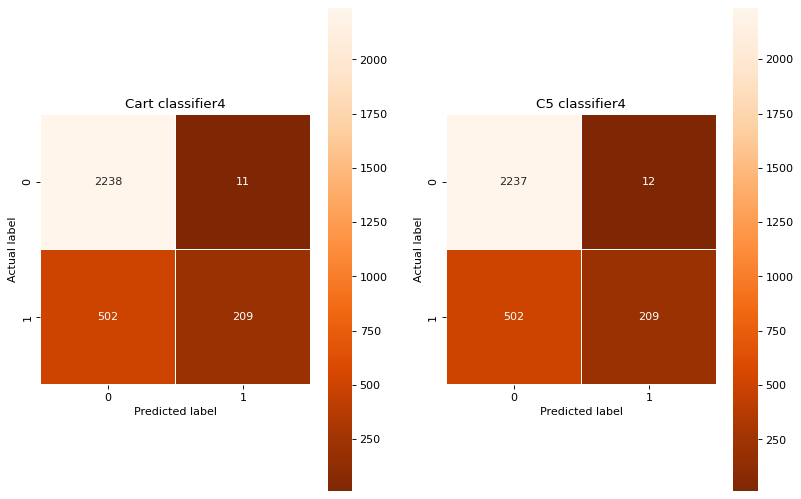

In [29]:
# Display CM for cart_classifier4
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
plt.title("Cart classifier4")

# Display CM for c5_classifier4
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier4, X_train, y_train, X_test, y_test)
plt.title("C5 classifier4")

# Accuracy and comparison between model4 (Cart and C5)

CART Training and Testing scores: 0.83, 0.83
C5.0 Training and Testing scores: 0.80, 0.80


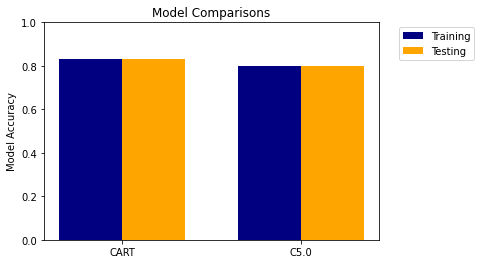

In [30]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier4 and c5_classifier4
compareModels(cart_classifier4, c5_classifier4)

With max depth=None and max leaf node=None, we were able to achieve an accuracy of 83% with the cart model and 80% with the c5 models.

# Accuracy comparison between all models



In [31]:
cart_train_score1 = round(cart_classifier1.score(X_train, y_train), 2) # cart training score
cart_test_score1 = round(cart_classifier1.score(X_test, y_test), 2)   # cart testing score
cart_train_score2 = round(cart_classifier2.score(X_train, y_train), 2) # cart training score
cart_test_score2 = round(cart_classifier2.score(X_test, y_test), 2)   # cart testing score
cart_train_score3 = round(cart_classifier3.score(X_train, y_train), 2) # cart training score
cart_test_score3 = round(cart_classifier3.score(X_test, y_test), 2)   # cart testing score
cart_train_score4 = round(cart_classifier4.score(X_train, y_train), 2) # cart training score
cart_test_score4 = round(cart_classifier4.score(X_test, y_test), 2)   # cart testing score

c5_train_score1 = round(c5_classifier1.score(X_train, y_train), 2) # c5 training score
c5_test_score1 = round(c5_classifier1.score(X_test, y_test), 2)   # c5 testing score
c5_train_score2 = round(c5_classifier2.score(X_train, y_train), 2) # c5 training score
c5_test_score2 = round(c5_classifier2.score(X_test, y_test), 2)   # c5 testing score
c5_train_score3 = round(c5_classifier3.score(X_train, y_train), 2) # c5 training score
c5_test_score3 = round(c5_classifier3.score(X_test, y_test), 2)   # c5 testing score
c5_train_score4 = round(c5_classifier4.score(X_train, y_train), 2) # c5 training score
c5_test_score4 = round(c5_classifier4.score(X_test, y_test), 2)   # c5 testing score



In [35]:
labels = ["model1", "model2", "model3", "model4"]
cart_score_train = [cart_train_score1 , cart_train_score2, cart_train_score3, cart_train_score4]
cart_score_test = [cart_test_score1,cart_test_score2,cart_test_score3,cart_test_score4]
c5_score_train = [c5_train_score1 , c5_train_score2, c5_train_score3, c5_train_score4]
c5_score_test = [c5_test_score1,c5_test_score2,c5_test_score3,c5_test_score4]


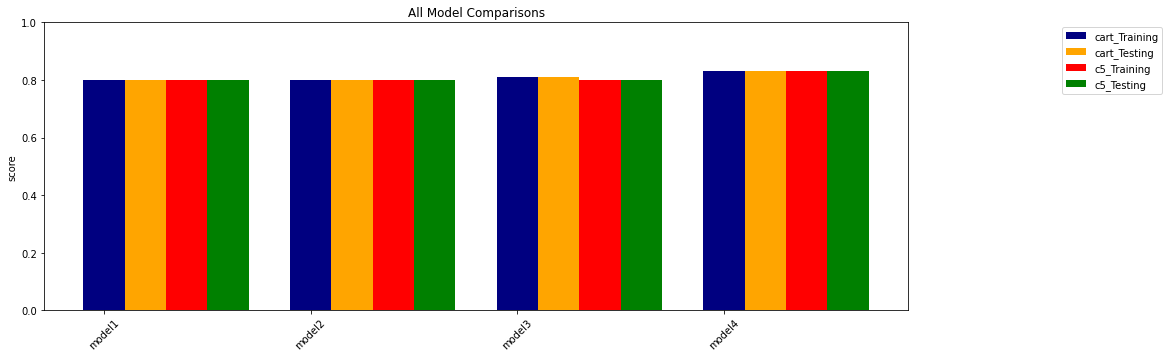

In [38]:
# Plot the accuracy claues
x = np.arange(4)  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
ax = fig.add_axes([0,0,2,1])

rects1 = ax.bar(x+ 0.00 , cart_score_train, width, label='cart_Training', color='navy')
rects2 = ax.bar(x + 0.20, cart_score_test, width, label='cart_Testing', color='orange')
rects3 = ax.bar(x + 0.40, c5_score_train, width, label='c5_Training', color='red')
rects4 = ax.bar(x + 0.60, c5_score_test, width, label='c5_Testing', color='green')


ax.set_ylabel('score')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.xticks(rotation = 45)
plt.title('All Model Comparisons')
plt.show()

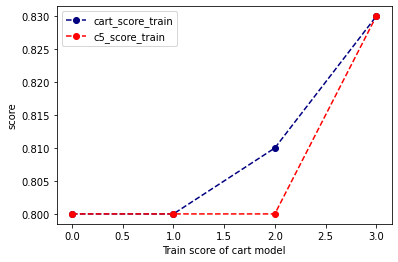

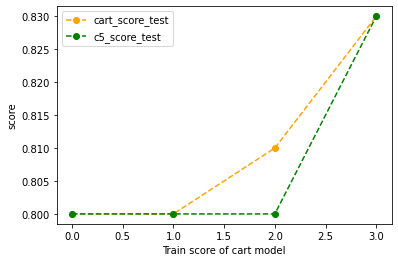

In [34]:
labels = ["cart_train_score1", "cart_score2", "score3", "score4"]
cart_score_train = [cart_train_score1 , cart_train_score2, cart_train_score3, cart_train_score4]
cart_score_test = [cart_test_score1,cart_test_score2,cart_test_score3,cart_test_score4]
c5_score_train = [c5_train_score1 , c5_train_score2, c5_train_score3, c5_train_score4]
c5_score_test = [c5_test_score1,c5_test_score2,c5_test_score3,c5_test_score4]


plt.plot(cart_score_train,"o--", color='navy',label="cart_score_train")
plt.plot(c5_score_train,"o--", color='red',label="c5_score_train")
plt.xlabel("Train score of cart model")
plt.ylabel("score")
plt.legend()
plt.show()

plt.plot(cart_score_test,"o--", color='orange',label="cart_score_test")
plt.plot(c5_score_test,"o--", color='green',label="c5_score_test")
plt.xlabel("Train score of cart model")
plt.ylabel("score")
plt.legend()
plt.show()


**Summary:**
We created 4 model for cart and 4 modelfor c5 strategy with varying max_depth and max_leaf_node, all of which had different accuracy. We discovered that changing the max depth and max leaf node values improves accuracy. We also discovered that the gini(cart) model has more accuracy than the entropy(c5) model.